In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data="/kaggle/input/100-largest-companies/Largest_Companies.csv"
df=pd.read_csv(data)

In [81]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [83]:
df.shape

(100, 7)

In [84]:
df.head(2)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"


In [85]:
# Convert numeric columns to appropriate data types
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(int)
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983,9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7%,"400,000","Minnetonka, Minnesota"


In [86]:
df['Revenue growth'] = df['Revenue growth'].str.replace('%','').astype(float)
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983,9.4,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,"400,000","Minnetonka, Minnesota"


In [87]:
df['Employees'] = df['Employees'].str.replace(',','').str.replace(' ','').astype('Int64')
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [88]:
df.describe()

,Rank,Revenue (USD millions),Revenue growth,Employees
count,100.000000,100.000000,100.000000,100.0
mean,50.500000,117566.460000,19.576000,168030.07
std,29.011492,100915.112163,21.463397,271749.30091
min,1.000000,44200.000000,0.500000,305.0
25%,25.750000,57876.000000,4.375000,44711.5
50%,50.500000,80824.500000,11.700000,89638.5
75%,75.250000,138763.000000,23.625000,196512.5
max,100.000000,611289.000000,97.200000,2100000.0


# Top 10 Industries:

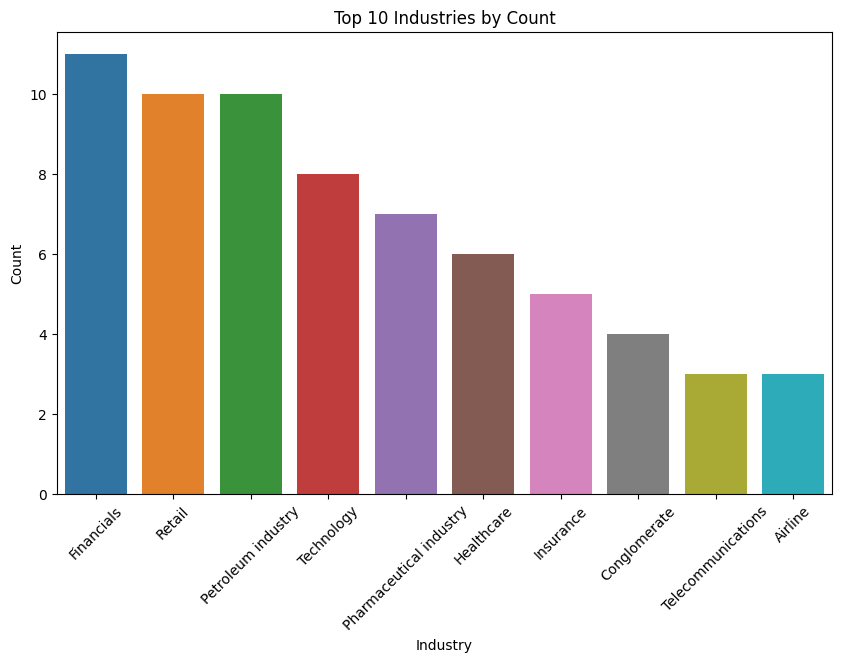

In [89]:
# Bar plot of the top 10 industries by count
top_industries = df['Industry'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_industries.index, y=top_industries.values)
plt.xticks(rotation=45)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 10 Industries by Count')
plt.show()

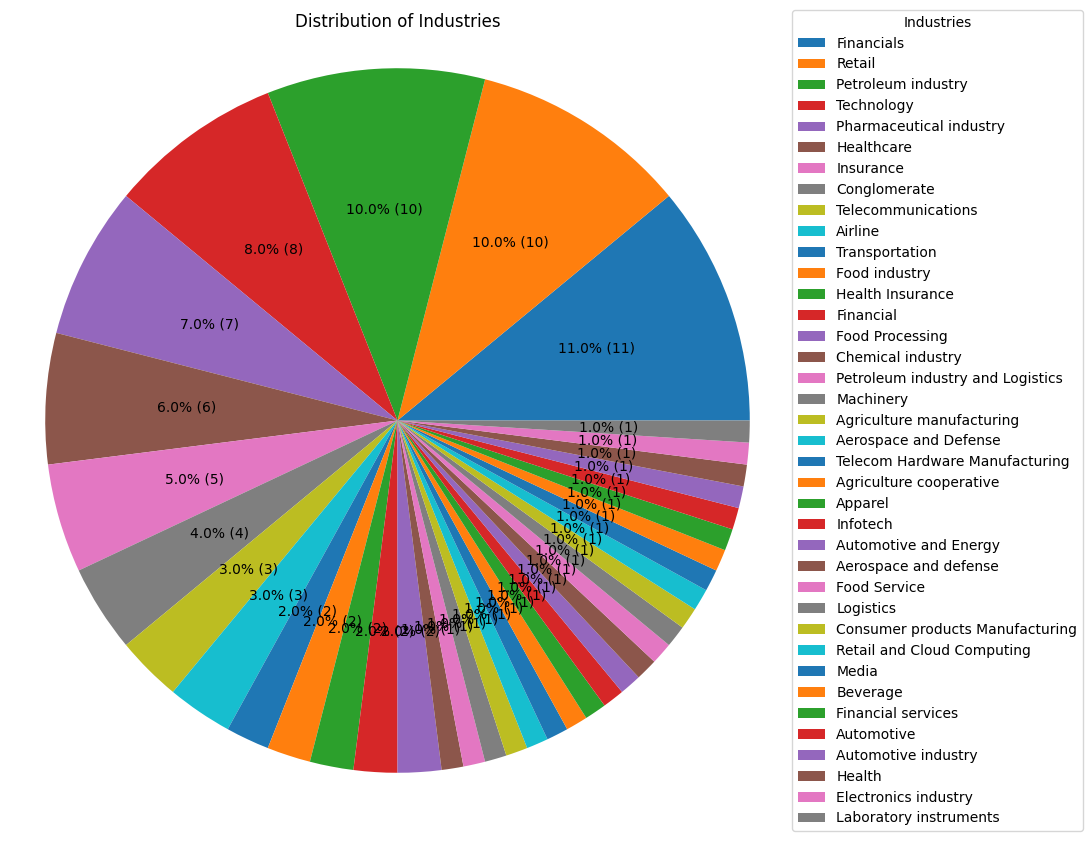

In [90]:
# Pie chart for the distribution of industries
industry_counts = df['Industry'].value_counts()
plt.figure(figsize=(10, 10))

# Customizeing the autopct format to display values
plt.pie(industry_counts, labels=None, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(industry_counts) / 100))
plt.legend(industry_counts.index, title="Industries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Industries')
plt.axis('equal')
plt.show()

**Geographic Heatmap:**

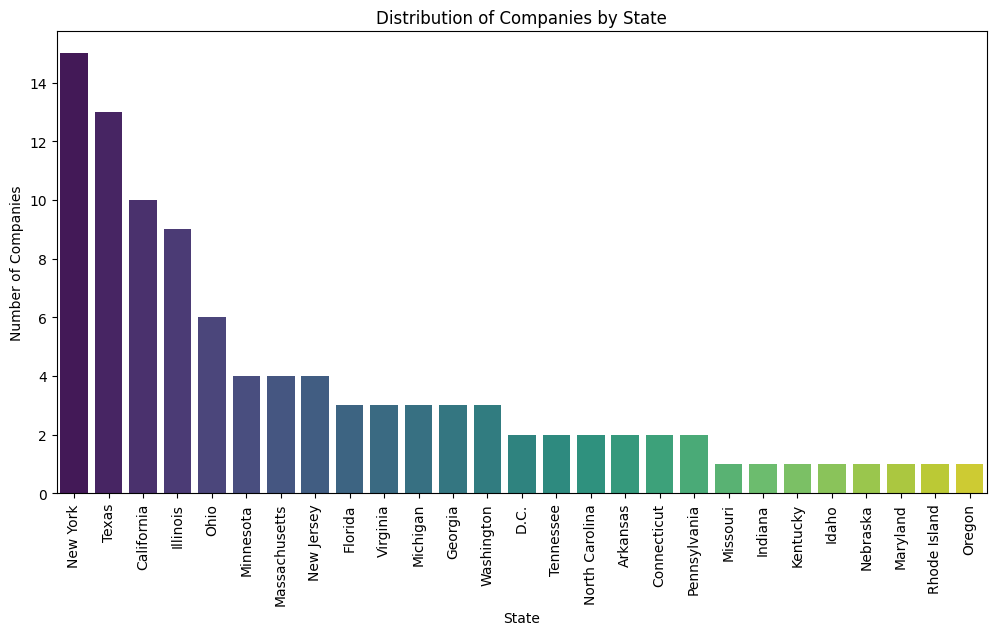

In [91]:
# Count companies by state
state_counts = df['Headquarters'].str.split(', ').str[-1].value_counts()

# Plot the distribution of companies by state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies by State')
plt.show()

In [92]:
employee_stats = df['Employees'].describe()
print(employee_stats)

count           100.0
mean        168030.07
std      271749.30091
min             305.0
25%           44711.5
50%           89638.5
75%          196512.5
max         2100000.0
Name: Employees, dtype: Float64


In [93]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [94]:
df[['Headquarter_city','Headquarters_state']]=(df['Headquarters'].str.split(",",n=1,expand=True))
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarter_city,Headquarters_state
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington",Seattle,Washington
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnetonka,Minnesota


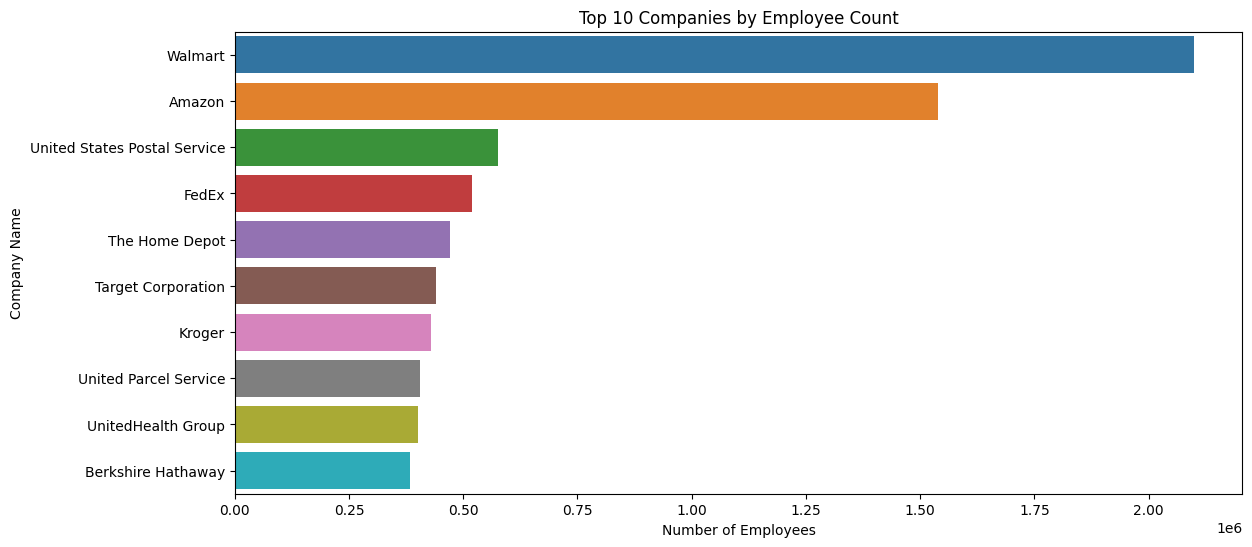

In [95]:
# Bar plot of the top companies by employee count
top_10_employees = df.nlargest(10, 'Employees')
plt.figure(figsize=(13, 6))
sns.barplot(x='Employees', y='Name', data=top_10_employees)
plt.xlabel('Number of Employees')
plt.ylabel('Company Name')
plt.title('Top 10 Companies by Employee Count')
plt.show()

In [96]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarter_city,Headquarters_state
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington",Seattle,Washington
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnetonka,Minnesota


In [97]:
df = df.drop('Headquarters',axis=1)

In [98]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarter_city,Headquarters_state
0,1,Walmart,Retail,611289,6.7,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,Seattle,Washington
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,Minnetonka,Minnesota


# Top-Ranked Companies:

In [99]:
top10=df.head(10)

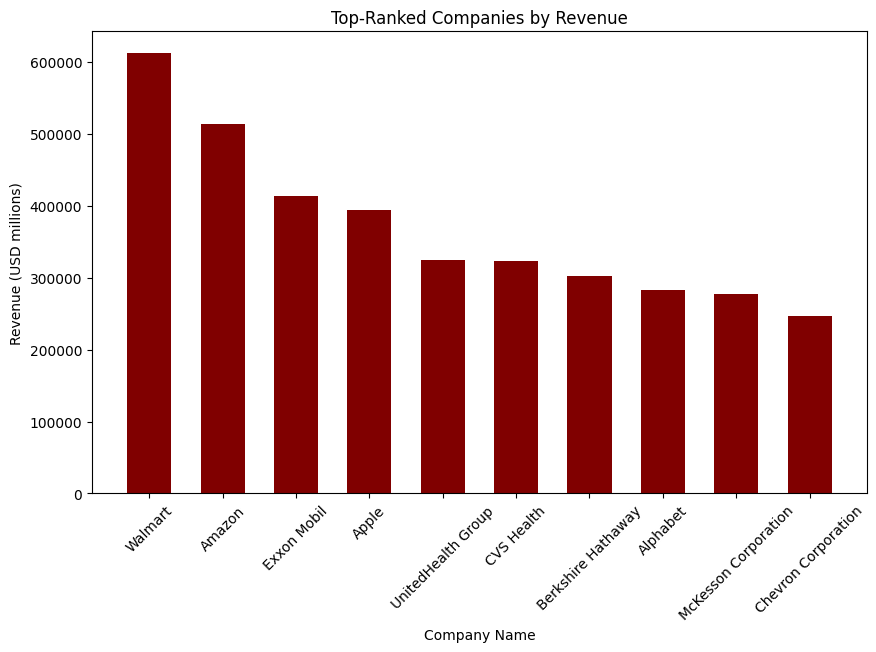

In [100]:
plt.figure(figsize=(10, 6))
plt.bar(top10['Name'], top10['Revenue (USD millions)'], color ='maroon', width = 0.6)
plt.xlabel('Company Name')
plt.ylabel('Revenue (USD millions)')
plt.title('Top-Ranked Companies by Revenue')
plt.xticks(rotation=45)
plt.show()

# Industry Analysis:

*  Industry Analysis: Examine the distribution of company revenues ("Revenue (USD millions)") to identify the range and distribution of revenue figures among the companies.

In [101]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarter_city,Headquarters_state
0,1,Walmart,Retail,611289,6.7,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,Seattle,Washington
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,Minnetonka,Minnesota


In [102]:
# Count the number of companies in each industry
industry_counts = df['Industry'].value_counts()

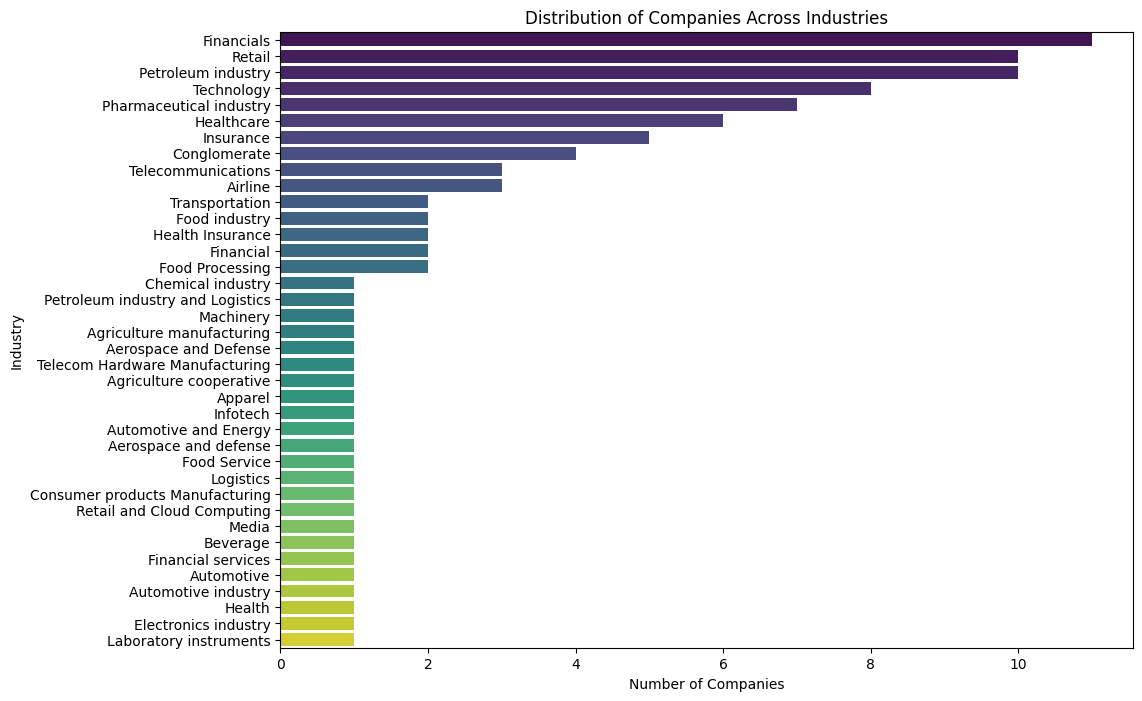

In [103]:
# Create a bar plot to visualize the distribution
plt.figure(figsize=(11, 8))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.title('Distribution of Companies Across Industries')
plt.show()

In [104]:
df.shape

(100, 8)

# Revenue Growth Trends:

In [105]:
# Sort the DataFrame by revenue growth
df=df.sort_values(by='Revenue growth', ascending=False)
df_top20_Rev_grow = df.head(20).copy()

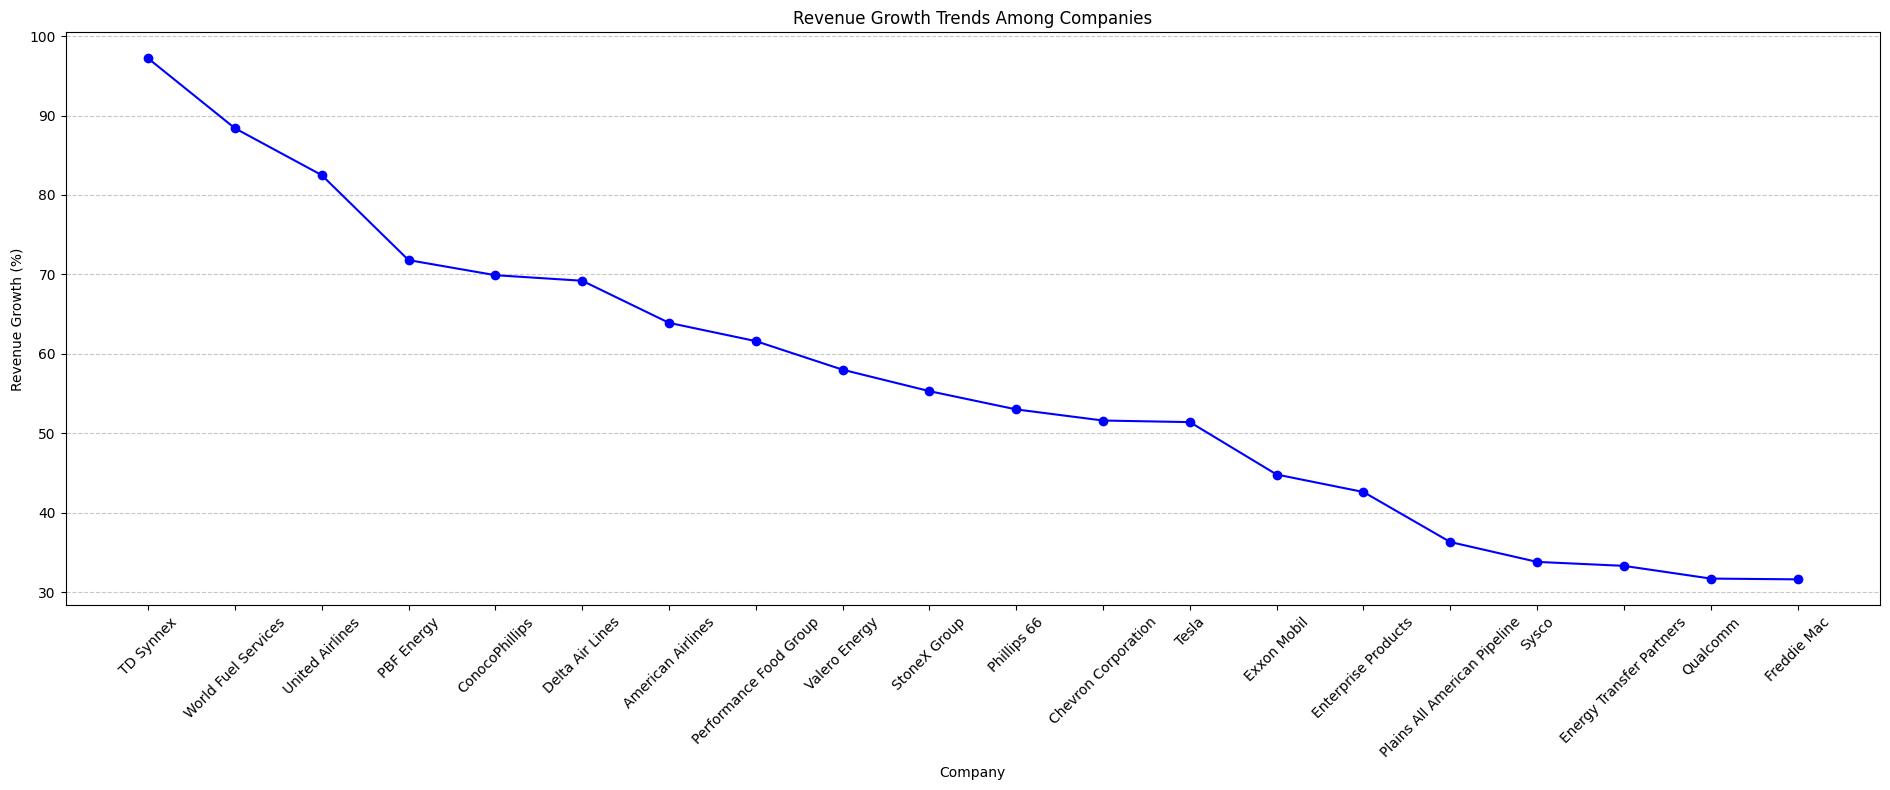

In [106]:
# Create a line plot to visualize revenue growth trends
plt.figure(figsize=(19, 8))
plt.plot(df_top20_Rev_grow['Name'], df_top20_Rev_grow['Revenue growth'], marker='o', linestyle='-', color='b')
plt.xlabel('Company')
plt.ylabel('Revenue Growth (%)')
plt.title('Revenue Growth Trends Among Companies')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Company Size:

In [107]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarter_city,Headquarters_state
65,66,TD Synnex,Infotech,62344,97.2,28500,Clearwater,Florida
71,72,World Fuel Services,Petroleum industry and Logistics,59043,88.4,5214,Miami,Florida
97,98,United Airlines,Airline,44955,82.5,92795,Chicago,Illinois
93,94,PBF Energy,Petroleum industry,46830,71.8,3616,Parsippany–Troy Hills,New Jersey
48,49,ConocoPhillips,Petroleum industry,82156,69.9,9500,Houston,Texas


In [108]:
# Sort the DataFrame by revenue growth
df.sort_values(by='Rank', ascending=True, inplace=True)
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarter_city,Headquarters_state
0,1,Walmart,Retail,611289,6.7,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,Seattle,Washington
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,Minnetonka,Minnesota


# Industry Revenue Comparison:

In [109]:
# Group the data by industry and calculate the average revenue for each industry
industry_average_revenue = df.groupby('Industry')['Revenue (USD millions)'].mean().reset_index()

In [110]:
industry_average_revenue.head()

,Industry,Revenue (USD millions)
0,Aerospace and Defense,65984.000000
1,Aerospace and defense,66608.000000
2,Agriculture cooperative,47194.000000
3,Agriculture manufacturing,52577.000000
4,Airline,48169.333333


In [111]:
industry_average_revenue = industry_average_revenue.sort_values(by='Revenue (USD millions)', ascending=False)

In [112]:
industry_average_revenue.head()

,Industry,Revenue (USD millions)
33,Retail and Cloud Computing,513983.0
13,Electronics industry,394328.0
20,Health,276711.0
22,Healthcare,198228.0
8,Automotive industry,158057.0


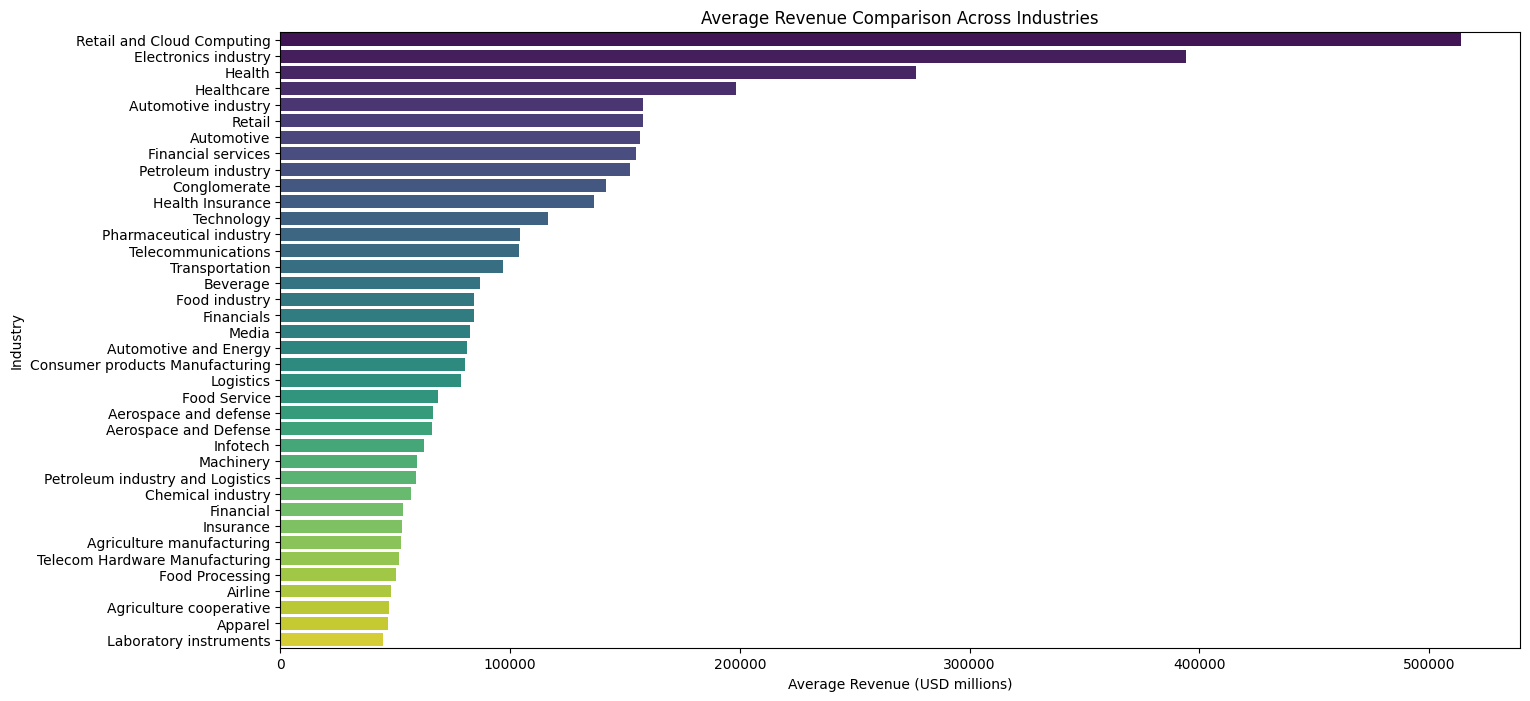

In [113]:
# Creating a bar plot to visualize the average revenue comparison
plt.figure(figsize=(16, 8))
sns.barplot(x='Revenue (USD millions)', y='Industry', data=industry_average_revenue, palette='viridis')
plt.xlabel('Average Revenue (USD millions)')
plt.ylabel('Industry')
plt.title('Average Revenue Comparison Across Industries')
plt.show()

# Correlation Analysis:

In [114]:
# Select the relevant columns for correlation analysis
correlation_df = df[['Revenue (USD millions)', 'Employees']]

In [115]:
correlation_df.head()

,Revenue (USD millions),Employees
0,611289,2100000
1,513983,1540000
2,413680,62000
3,394328,164000
4,324162,400000


In [116]:
# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

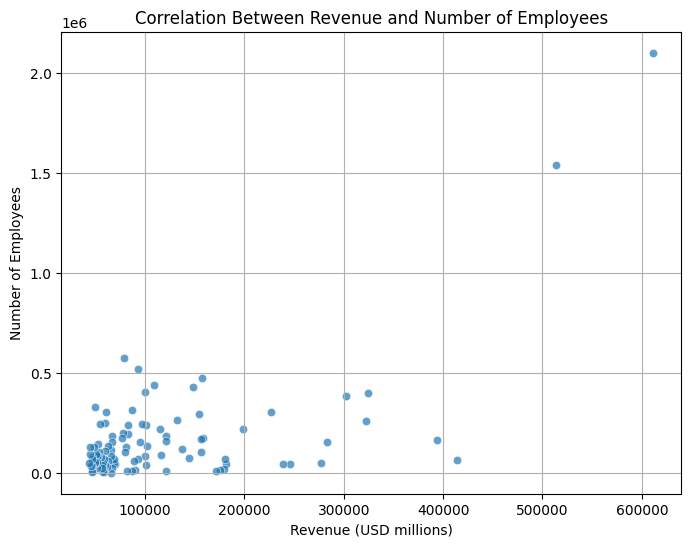

In [117]:
# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=correlation_df, x='Revenue (USD millions)', y='Employees', alpha=0.7)
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Number of Employees')
plt.title('Correlation Between Revenue and Number of Employees')
plt.grid(True)
plt.show()

# Regional Revenue Trends:

/tmp/ipykernel_32/3196674501.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Revenue (USD millions)', y='Headquarters_state', data=df, ci=None, palette='viridis')


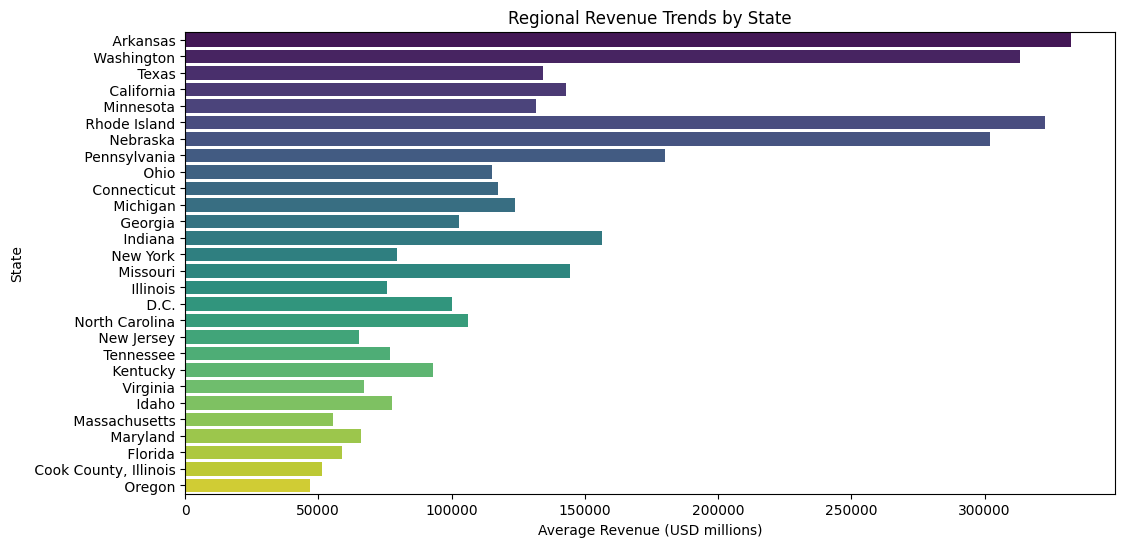

In [118]:
# Create a bar chart to visualize regional revenue trends
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue (USD millions)', y='Headquarters_state', data=df, ci=None, palette='viridis')
plt.xlabel('Average Revenue (USD millions)')
plt.ylabel('State')
plt.title('Regional Revenue Trends by State')
plt.show()

In [119]:
# Sort the states in ascending order by average revenue
state_order = df.groupby('Headquarters_state')['Revenue (USD millions)'].mean().sort_values().index

/tmp/ipykernel_32/3401561890.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Revenue (USD millions)', y='Headquarters_state', data=df, ci=None, palette='viridis', order=state_order)


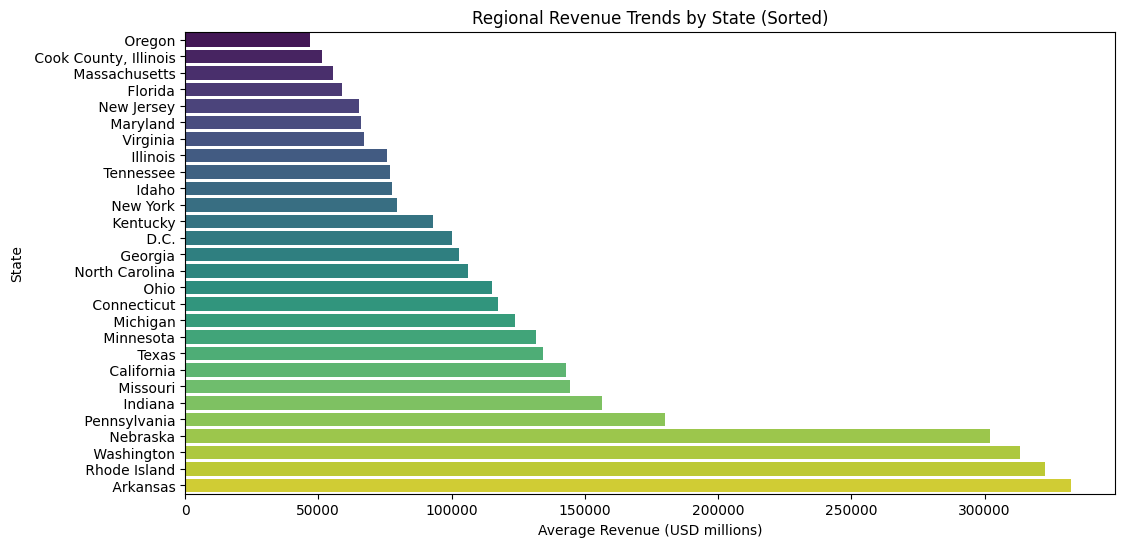

In [120]:
# Create a bar chart with sorted states
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue (USD millions)', y='Headquarters_state', data=df, ci=None, palette='viridis', order=state_order)
plt.xlabel('Average Revenue (USD millions)')
plt.ylabel('State')
plt.title('Regional Revenue Trends by State (Sorted)')
plt.show()

# Outliers:

In [121]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarter_city,Headquarters_state
0,1,Walmart,Retail,611289,6.7,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,Seattle,Washington
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,Minnetonka,Minnesota


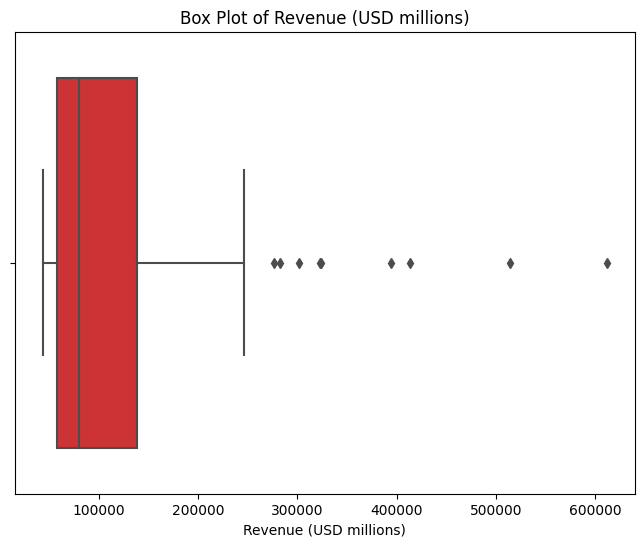

In [122]:
# Create a box plot for Revenue (USD millions)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Revenue (USD millions)'], palette='Set1')
plt.title('Box Plot of Revenue (USD millions)')
plt.show()

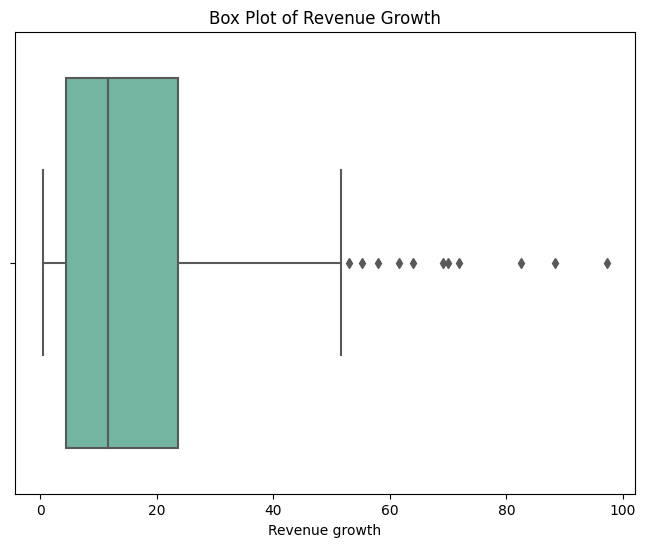

In [123]:
# Create a box plot for Revenue growth
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Revenue growth'], palette='Set2')
plt.title('Box Plot of Revenue Growth')
plt.show()

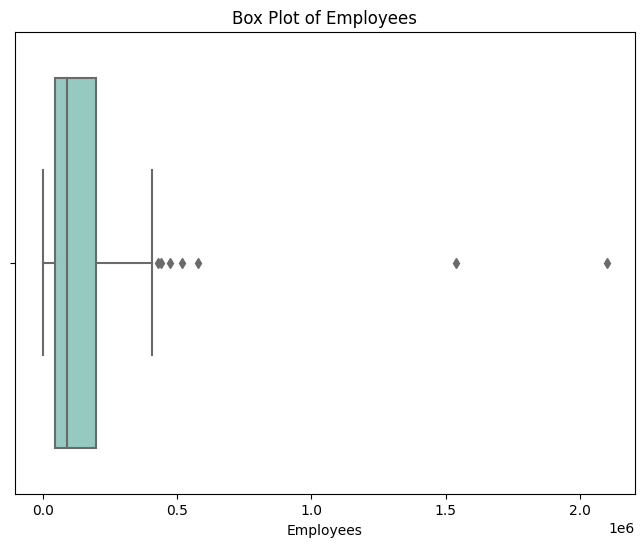

In [124]:
# Create a box plot for Employees
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Employees'], palette='Set3')
plt.title('Box Plot of Employees')
plt.show()